In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data=pd.read_csv("/content/diabetes.csv")
data.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [48]:
X=data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
y=data['Outcome']

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) # Use stratify to have the same proportion of each class

In [50]:
from keras.callbacks import ModelCheckpoint
from keras import models
from keras import layers

checkpoint = ModelCheckpoint(filepath='/content/best_model.h5', 
                               monitor='val_accuracy', verbose=1, save_best_only=True)
callbacks = [checkpoint]
number_of_features=8
network = models.Sequential()
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu", input_shape=(
number_of_features,)))
# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=16, activation="relu"))
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1, activation="sigmoid")) # No activation for regression
# Compile neural network
network.compile(loss="binary_crossentropy", # Cross-entropy # "mse" for regression
optimizer="adam", # Root Mean Square Propagation
metrics=["accuracy"]) # Accuracy performance metric
history = network.fit(X_train, # Features
y_train, # Target vector
epochs=100,
verbose=1,
callbacks=callbacks, # Print description after each epoch
batch_size=10,
validation_data=(X_test, y_test)) 

Epoch 1/100
41/54 [=====================>........] - ETA: 0s - loss: 43.2040 - accuracy: 0.3220 
Epoch 1: val_accuracy improved from -inf to 0.35065, saving model to /content/best_model.h5
54/54 [==============================] - 1s 5ms/step - loss: 36.6752 - accuracy: 0.3482 - val_loss: 11.8775 - val_accuracy: 0.3506
Epoch 2/100
42/54 [======================>.......] - ETA: 0s - loss: 3.4157 - accuracy: 0.5405 
Epoch 2: val_accuracy improved from 0.35065 to 0.57143, saving model to /content/best_model.h5
54/54 [==============================] - 0s 2ms/step - loss: 2.8507 - accuracy: 0.5531 - val_loss: 1.0308 - val_accuracy: 0.5714
Epoch 3/100
47/54 [=========================>....] - ETA: 0s - loss: 0.7594 - accuracy: 0.6234
Epoch 3: val_accuracy improved from 0.57143 to 0.62338, saving model to /content/best_model.h5
54/54 [==============================] - 0s 2ms/step - loss: 0.7476 - accuracy: 0.6294 - val_loss: 0.8891 - val_accuracy: 0.6234
Epoch 4/100
41/54 [=====================>

In [59]:
from keras.models import load_model
network = load_model('/content/best_model.h5')

In [60]:
preds=[]
predictions=network.predict(X_test, verbose=1)
for i in range(len(predictions)):
  if predictions[i]>=0.5:
    preds.append(1)
  else:
    preds.append(0)

8/8 [==============================] - 0s 1ms/step


0.7445887445887446

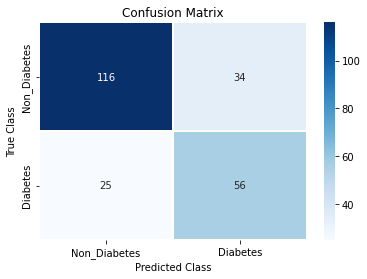

In [61]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score
cf_matrix=confusion_matrix(y_test, preds)
ax=plt.subplot()
sns.heatmap(cf_matrix, cmap='Blues', annot=True, linewidths=1, fmt = 'd', ax=ax)
ax.set_xlabel('Predicted Class');ax.set_ylabel('True Class')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Non_Diabetes', 'Diabetes']); ax.yaxis.set_ticklabels(['Non_Diabetes', 'Diabetes'])
accuracy_score(y_test, preds)